In [1]:
from IPython.display import Image

import warnings
warnings.filterwarnings(action = "ignore")

# <span style="color:brown">01. 합성곱과 풀링(Convolution and Pooling)</span>

---

**합성곱 신경망(Convolution Neural Network)** 은 **이미지 처리**에 탁월한 성능을 보이는 신경망이다.

이번 과정에서는 합성곱 신경망에 대해서 학습해보도록 한다.<br><br>

합성공 신경망은 크게 **합성곱층(Convolution Layer)** 과 **풀링층(Pooling Layer)** 으로 구성된다.

아래의 그림은 합성곱 신경망의 일반적인 예를 보여준다.

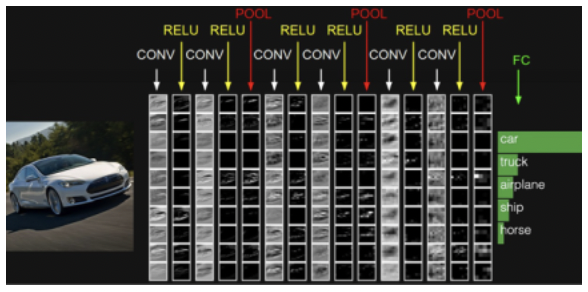

In [4]:
display(Image("./Images/합성곱 신경망.png", width = 400))

위의 그림에서 `CONV`는 합성곱 연산을 의미하고, 합성곱 연산의 결과가 활성화 함수 ReLU를 지난다. 이 두 과정을 합성곱층이라고 한다.

그 후에 `POOL`이라는 구간을 지나는데 이는 풀링 연산을 의미하며, 풀링층이라고 한다.<br><br>

이번 과정에서는 합성곱 연산과 풀링 연산의 의미에 대해서 학습하도록 한다.

## <span style="color:orange">1. 합성곱 신경망의 대두</span>

합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망이다.

이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수는 있지만 한계가 있다.

예를 들어, 알파벳 손글씨를 분류하는 어떤 문제가 있다고 가정해보도록 한다.

아래의 그림은 알파벳 Y를 비교적 정자로 쓴 손글씨와 다소 휘갈겨 쓴 손글씨 두 개를 2차원 텐서인 행렬로 표현한 것이다.

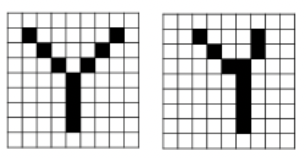

In [5]:
display(Image("./Images/합성곱 신경망의 대두1.png"))

사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하지만, 기계가 보기에는 각 픽셀마다 가진 값이 거의 상이하므로 완전히 다른 값을 가진 입력이다.

그런데 이미지라는 것은 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재한다.

**다층 퍼셉트론은 몇 가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점**이 있다.<br><br>

좀 더 구체적으로 보도록한다.

위 손글씨를 다층 퍼셉트론으로 분류한다고 하면, 이미지를 **1차원 텐서**인 벡터로 변환하고 다층 퍼셉트론의 입력층으로 사용해야 한다.

두번째 손글씨를 다층 퍼셉트론으로 분류하기 위해서 벡터로 바꾸면 다음과 같다.

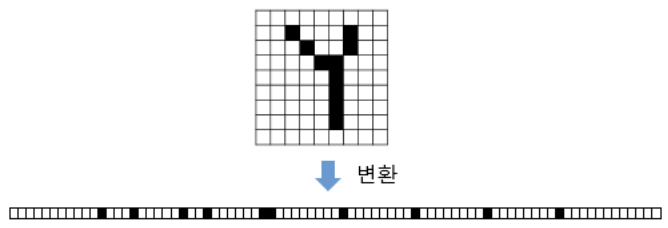

In [7]:
display(Image("./Images/합성곱 신경망의 대두2.png", width = 500))

1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵다.

이는 기계도 마찬가지이며, 위와 같은 결과는 변환 전에 가지고 있던 공간적인 구조(Spatial Structure) 정보가 유실된 상태이다.

여기서 **공간적인 구조 정보**라는 것은 **거리가 가까운 어던 픽셀들끼리는 어떤 연관이 있고, 어떤 픽셀들끼리는 값이 비슷하거나 등**을 포함하고 있다.

결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 사용하는 것이 합성곱 신경망이다.

## <span style="color:orange">2. 채널(Channel)</span>

이미지 처리의 기본적인 용어인 **채널**에 대해서 간단히 정의하도록 한다.<br><br>

기계는 글자나 이미지보다 숫자, 다시 말해 텐서를 더 잘 처리할 수 있다.

이미지는 **(높이, 너비, 채널)** 이라는 3차원 텐서이다.

여기서 **높이**는 이미지의 세로 방향 픽셀 수, **너비**는 이미지의 가로 방향 픽셀 수, **채널**은 색 성분을 의미한다.

흑백 이미지는 채널 수가 1이며, 각 픽셀은 0부터 255 사이의 값을 가진다.

아래는 28 x 28 픽셀의 손글씨 데이터를 보여준다.

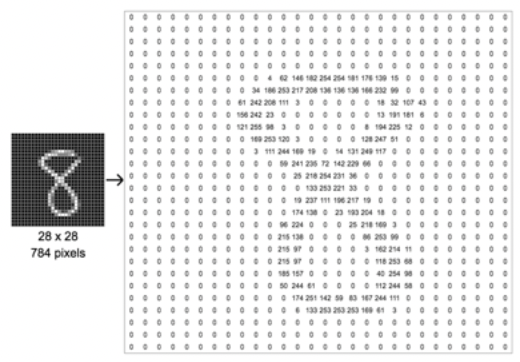

In [8]:
display(Image("./Images/채널1.png", width = 500))

위 손글씨 데이터는 흑백 이미지이므로 채널 수가 1임을 고려하면 (28 x 28 x 1)의 크기를 가지는 3차원 텐서이다.

그렇다면 흑백이 아니라 우리가 통상적으로 접하게 되는 컬러 이미지는 어떨까?

컬러 이미지는 적색(Red), 녹색(Green), 청색(Blue) 채널 수가 3개이다.

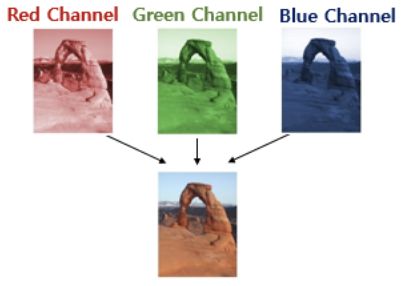

In [12]:
display(Image("./Images/채널2.png", width = 300))

하나의 픽셀은 세가지 색깔, 삼원색의 조합으로 이루어진다.

만약 높이가 28, 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 (28 x 28 x 3)의 크기를 가지는 3차원 텐서이다.

채널을 떄로는 **깊이(Depth)** 라고도 한다.

이 경우 이미지는 (높이, 너비, 깊이)라는 3차원 텐서로 표현된다고 말할 수 있다.

## <span style="color:orange">3, 합성곱 연산(Convolution Operation)</span>